In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
%%markdown
# Intro to modules

# Intro to modules


In [4]:
# synthetic data

X = np.array([[1,2,3], [11,12,13]])
y = np.array([2.1, 11.9])
print(X.shape, y.shape)

X_test = np.array([[2,3,4]])
print(X_test.shape)

(2, 3) (2,)
(1, 3)


In [5]:
from sklearn.linear_model import LinearRegression

# Init the model, set hyperparams
lr = LinearRegression()

# Train the model
lr.fit(X,y)

# prediction
lr.predict(X_test)

array([3.08])

In [6]:
from sklearn.preprocessing import StandardScaler

# init tranformer
sc = StandardScaler()

X_tansformed = sc.fit_transform(X)

In [7]:
from sklearn.pipeline import Pipeline

# init pipe
pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', LinearRegression())
])

# run pipe
pipe.fit(X,y).predict(X_test)

array([3.08])

In [8]:
%%markdown
# Intro to train test split, running first pipeline

# Intro to train test split, running first pipeline


In [9]:
df = pd.read_csv('./house_prices_small.csv')


In [10]:
# check missing vals
df.isna().sum()

SalePrice        0
LotArea          0
OverallQual      0
SaleCondition    0
YearBuilt        0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

tr, te = train_test_split(df)

y_train, y_test = tr.SalePrice, te.SalePrice
X_train, X_test  = tr.drop(columns=['SalePrice'], axis=1), te.drop(columns=['SalePrice'], axis=1)

In [12]:
# preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['SaleCondition']),
    ('sc', StandardScaler(), ['LotArea', 'YearBuilt'])
], remainder='passthrough')


In [13]:
pipe = Pipeline([
    ('col_transf', ct),
    ('regression', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('col_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  ['SaleCondition']),
                                                 ('sc', StandardScaler(),
                                                  ['LotArea', 'YearBuilt'])])),
                ('regression', LinearRegression())])

In [14]:
# preidcting prices
y_pred = pipe.predict(X_test)

# finding root mean square erorr
rmse = np.mean((y_pred - y_test)**2)**0.5

print(f'Root-mean-square-error: {int(rmse)}')

Root-mean-square-error: 45122


In [15]:
%%markdown
# Digits

# Digits


In [16]:
from sklearn.datasets import load_digits

digits = load_digits()

In [17]:
digits.data.shape, digits.images.shape, digits.target.shape

((1797, 64), (1797, 8, 8), (1797,))

In [18]:
# check one image - must be b&w pic
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

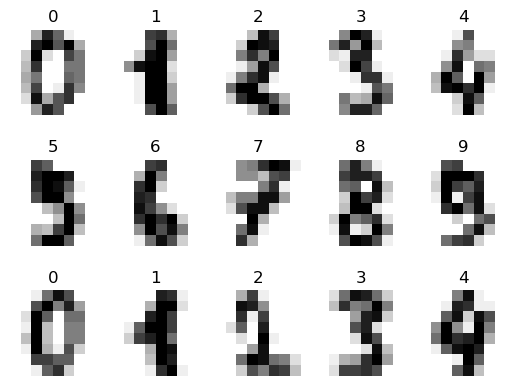

In [19]:
# visual repr of our data
_, axes = plt.subplots(3,5)
axes = axes.flatten()

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(label)

In [20]:
# when working with pictures, we can either work with the picture matrix, or reshape it into the picture vector. we work with vectors today

# train test split for our data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [21]:
# when working with pictures, we can either work with the picture matrix, or reshape it into the picture vector. we work with vectors today

# train test split for our data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sacling', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('sacling', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [23]:
# check accuracy
from sklearn.metrics import accuracy_score

# predicting
y_pred = pipe.predict(X_test)

# checking score
score = accuracy_score(y_pred, y_test)
print(f'Accuracy: {score:.2%}')

Accuracy: 97.33%


In [24]:
%%markdown
# Texts

# Texts


In [25]:
d1 = "This is my favourite movie"
d2 = "Is this movie boring? Yes, it is!"
d3 = "This is an exiting movie"

In [26]:
import re

D = [re.sub('[^a-zA-Z]', ' ', d.lower()).split() for d in [d1,d2,d3]]

In [27]:
all_words = sum(D, [])
set_words = list(set(all_words))

In [28]:
%%markdown
# HW1

# HW1


In [30]:
df = pd.read_csv('./house_prices_small.csv')

df.drop_duplicates().shape[0]

1459

In [ ]:
df.shape[0]

In [ ]:
import pandas as pd

df = pd.read_csv('./house_prices_small.csv')

df.groupby('SaleCondition').SalePrice.mean()



SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: SalePrice, dtype: float64

In [ ]:
# Consider a binary classification task, where you are asked to predict whether house quality is higher than 5 (out of 10).
#  There is a categorical feature `SaleCondition` in the training dataset, which you can find below (`house_prices_small.csv`). 
# Encode this categorical feature using frequency encoding and report its numeric value for the most common observation (round to 2 digits).
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('./house_prices_small.csv')

le = LabelEncoder()
df['SaleCondition'] = le.fit_transform(df['SaleCondition'])

df['SaleCondition'].value_counts(normalize=True).round(2)



4    0.82
5    0.09
0    0.07
3    0.01
2    0.01
1    0.00
Name: SaleCondition, dtype: float64